In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [2]:
gdp_df=pd.read_csv('gdp-per-capita-ppp-constant-2011.csv',index_col=0)
gdp_df

,"GDP per capita, PPP (constant 2011 international $)"
Year,
1990,1754.857
1991,1737.615
1992,1796.532
1993,1845.149
1994,1930.113
1995,2036.796
1996,2149.366
1997,2194.903
1998,2288.048


In [3]:
idx=pd.PeriodIndex(gdp_df.index,freq='Y')
gdp_df.index=idx
gdp_df

,"GDP per capita, PPP (constant 2011 international $)"
Year,
1990,1754.857
1991,1737.615
1992,1796.532
1993,1845.149
1994,1930.113
1995,2036.796
1996,2149.366
1997,2194.903
1998,2288.048


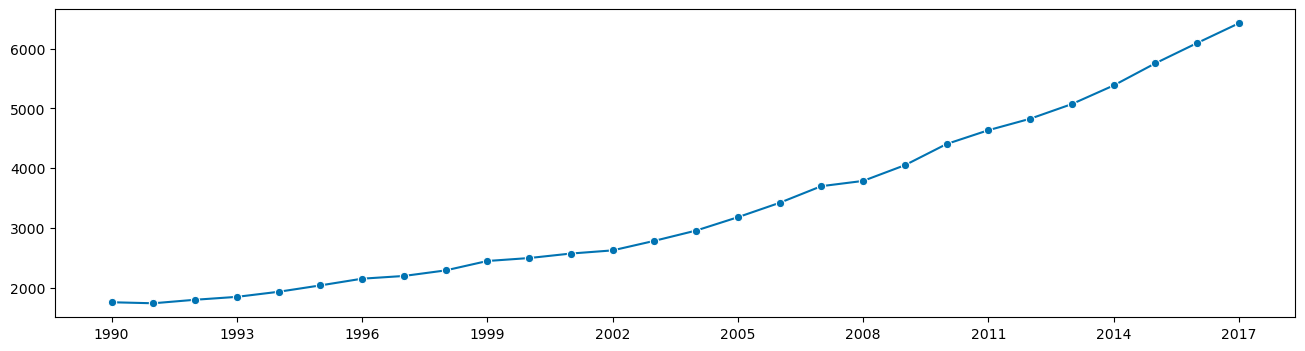

In [4]:
plot_series(gdp_df);

In [5]:
y=gdp_df['GDP per capita, PPP (constant 2011 international $)']
y_train,y_test=temporal_train_test_split(y,test_size=6)
print(y_train.shape, y_test.shape)

(22,) (6,)


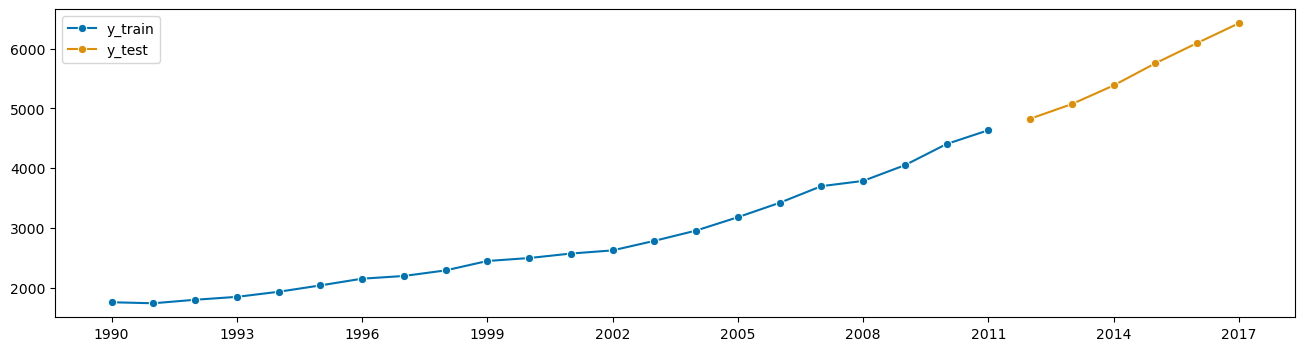

In [6]:
plot_series(y_train,y_test,labels=['y_train','y_test']);

In [7]:
fh=ForecastingHorizon(y_test.index,is_relative=False)

In [10]:
forecaster=AutoETS(auto=True,sp=1)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                   22
Model:                       ETS(MAN)   Log Likelihood                -121.458
Date:                Thu, 16 Nov 2023   AIC                            252.916
Time:                        18:59:32   BIC                            258.371
Sample:                    12-31-1990   HQIC                           254.201
                         - 12-31-2011   Scale                            0.001
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9928      0.277      3.586      0.000       0.450       1.535
smoothing_trend     0.4938      0.237      2.081      0.037       0.029       0.959
initial_level    1729.5987     4

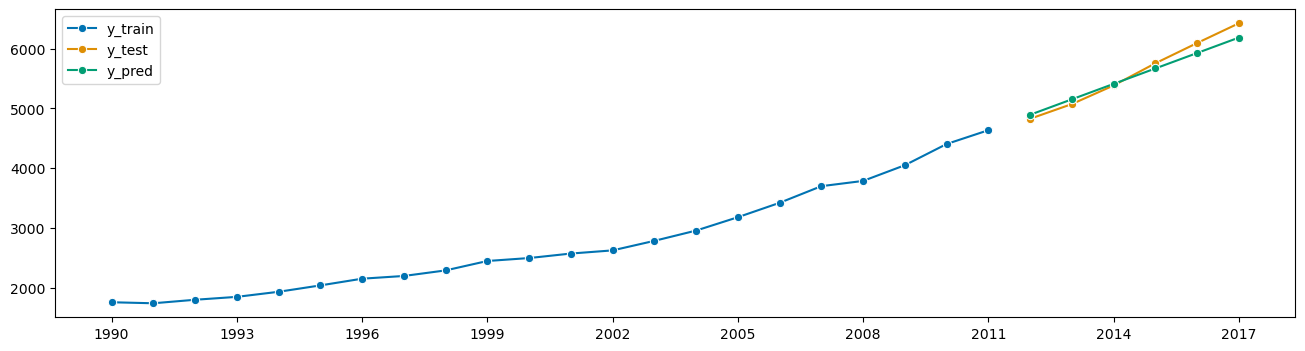

In [11]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=['y_train','y_test','y_pred'])
plt.show()

In [12]:
mean_squared_error(y_test,y_pred,square_root=True)

131.95948294896198